# Campus Recruitment Data Anylsis

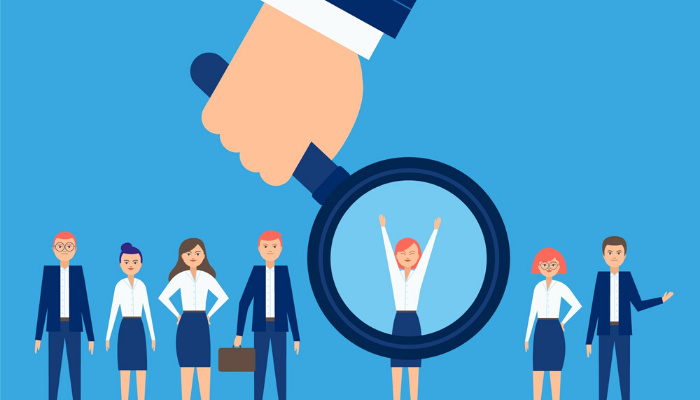



## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go 
import pandas_profiling

## Reading Dataset

In [ ]:
data = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv', index_col='sl_no')
data.head()

## Pandas-Profiling Interactive Report

In [ ]:
data.profile_report(title='Report: Campus Recruitment Data', progress_bar=False)

> It can be observed that salary column having some missing values.

In [ ]:
data.replace({'Placed' : 1, 'Not Placed': 0}, inplace=True)
data.replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
data[data['status']==0].head()

> we can see that only salary column is having missing values for those who are placed. So it's a MAR type.

## Placed and Unplaced students in different specialization by Gender

In [ ]:

fig = px.bar(data, x="gender", color="specialisation",barmode="group",
             facet_row="status",
             )
fig.update_layout(title_text='Facet view of the Placed / Unplaced students in different specialization by Gender')
fig.show()

* Remark
    > It can be observed that the students who are placed are more from finance specialisation from both the genders

## Salary vs MBA Percentage of different Specialisation

In [ ]:
fig = px.scatter(data, x='mba_p', y='salary', color='specialisation')
fig.update_layout(title='Salary Vs MBA percentage',xaxis_title="Percentage",yaxis_title="Salary in Millions")
fig.show()

**Remark :** There is not such difference that is seen in the figure above. But if we observe carefully Finance guys are somehow got more salary as compared to HR 

## Distribution of Salary for specialisation

In [ ]:
df = data.groupby('specialisation')

fig = go.Figure()
fig.add_trace(go.Histogram(x=df.get_group('Mkt&HR')['salary'],marker_color="orange",name="Market & HR"))
fig.add_trace(go.Histogram(x=df.get_group('Mkt&Fin')['salary'],marker_color="green",name="Market & Finance"))

# Overlay both histograms
fig.update_layout(barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Distribution of Salary for (Market & HR) and (Market & Finance)",xaxis_title="Salary in K",yaxis_title="Counts")
fig.show()


**REMARK:** It can be clearly show that the number of student placed in different salary groups are more from Finance specialisation

## Salary vs Employability test percentage

In [ ]:
fig = px.scatter(data, x='etest_p', y='salary', color='specialisation')
fig.update_layout(title='Salary vs Employability test percentage',xaxis_title="Employability test Percentage",yaxis_title="Salary in Millions")
fig.show()

## Specialisation Count

In [ ]:
df = data['specialisation'].value_counts().to_frame().reset_index().rename(columns={'index': 'specialisation', 'specialisation' : 'count'})

fig = go.Figure([go.Pie(labels=df['specialisation'], values=df['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Specialisation Count",title_x=0.5)
fig.show()

## Placement % each specialisation by gender

In [ ]:
df = data.copy().reset_index()
df['status'] = df.status.replace({0:'Not Placed', 1:'Placed'})
df=pd.DataFrame(df.groupby(['gender','specialisation','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

# df.head()
fig = px.sunburst(df, path=['gender','specialisation','status'], values='no. of students', 
                 color=df['no. of students'],color_continuous_scale='orrd')
fig.update_layout(title="Placement % in each specialisation by gender",title_x=0.5)
fig.show()

## Salary Distribution 

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['salary'],  
                                  marker_color="green",
                      xbins=dict(start=200000, end=1000000, size=10000 )
                                  )])
fig.update_layout(title="Distribution of Salary",xaxis_title="Salary",yaxis_title="Counts")
fig.show()

## Distribution of Percentage of both Specialisations

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=data[data['specialisation']=='Mkt&Fin']['mba_p'],
                     marker_color="blue",
                     name="Marketing & Finance"))
fig.add_trace(go.Box(y=data[data['specialisation']=='Mkt&HR']['mba_p'],
                     marker_color="red",
                     name="Marketing & HR"))
fig.update_layout(title="Distribution of Percentage - Marketing & Finance and Marketing & HR", yaxis_title='Obtained Percentage (%)')
fig.show()

## Placement(%) record taking gender, specialisation, degree type, Specialization in HS.

In [ ]:
df = data.copy().reset_index()
df['status'] = df.status.replace({0:'Not Placed', 1:'Placed'})
df=pd.DataFrame(df.groupby(['gender','specialisation','degree_t','hsc_s','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

# df
fig = px.sunburst(df, path=['gender','specialisation','degree_t','hsc_s','status'], values='no. of students', 
                 color=df['no. of students'],color_continuous_scale='orrd')
fig.update_layout(title="Placement % record taking gender, specialisation, degree type, Specialization in HS.",title_x=0.5)
fig.show()

## Please UPVOTE if you LIKED IT